In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [3]:
import math

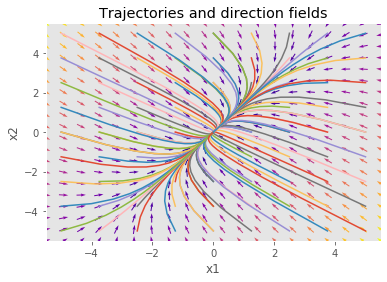

In [33]:
def dxdt(z, t=0):
    x1 = z[0]
    x2 = z[1]
    dx1dt = -3 * x1 + math.sqrt(2) * x2
    dx2dt = math.sqrt(2) * x1 - 2 * x2
    return [dx1dt, dx2dt]

t = np.linspace(0, 12, 100)
for i in np.linspace(0, 5, 5):
    for j in np.linspace(0, 5, 5):
        for k in [-1, 1]:
            for l in [-1, 1]:
                y0 = [k * i, l * j]
                y = odeint(dxdt, y0, t)
                x1 = y[:, 0]
                x2 = y[:, 1]
                plt.plot(x1, x2)
ymax = plt.ylim(ymin=0)[1]
xmax = plt.xlim(xmin=0)[1]
points_num = 20
x1 = np.linspace(-1 * xmax, xmax, points_num)
x2 = np.linspace(-1 * ymax, ymax, points_num)
X1 , X2 = np.meshgrid(x1,x2)
DX1, DX2 = dxdt([X1, X2])
M = (np.hypot(DX1, DX2))
M[M == 0] = 1.
DX1 /= M
DX2 /= M
 
plt.title('Trajectories and direction fields')
plt.quiver(X1, X2, DX1, DX2, M, pivot='mid', cmap=plt.cm.plasma)
plt.xlabel('Prey abundance')
plt.ylabel('Predator abundance')
plt.grid()
plt.xlim(-1 * xmax, xmax)
plt.ylim(-1 * ymax, ymax)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()